In [9]:
from project_handlers.project_info import ProjectInfo
from project_handlers.project_data_handler import ProjectDataHandler
import utils.plotting
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import numpy as np
from torchvision import transforms
from lib.models.rppg_transforms import RollingNormalize, RPPGDetrend

In [10]:
t1 = transforms.Compose([RollingNormalize(100)])

In [11]:
dataset_name = 'grid25'
shuffle = True
transform = None

In [12]:
info = ProjectInfo()
t_size = info.t_size
data_root = info.data_root
sampling_rate = info.sampling_rate

In [13]:
data_handler = ProjectDataHandler(info.data_root)
dataset = data_handler.load_data(dataset_name, transform=transform)

data_loader = DataLoader(dataset, batch_size=5, shuffle=shuffle)
X, y = next(iter(data_loader))
print('X shape ' + str(X.shape))
print('y shape ' + str(y.shape))

X shape torch.Size([5, 3, 200, 25])
y shape torch.Size([5, 200])


# Spaciotemporal Map

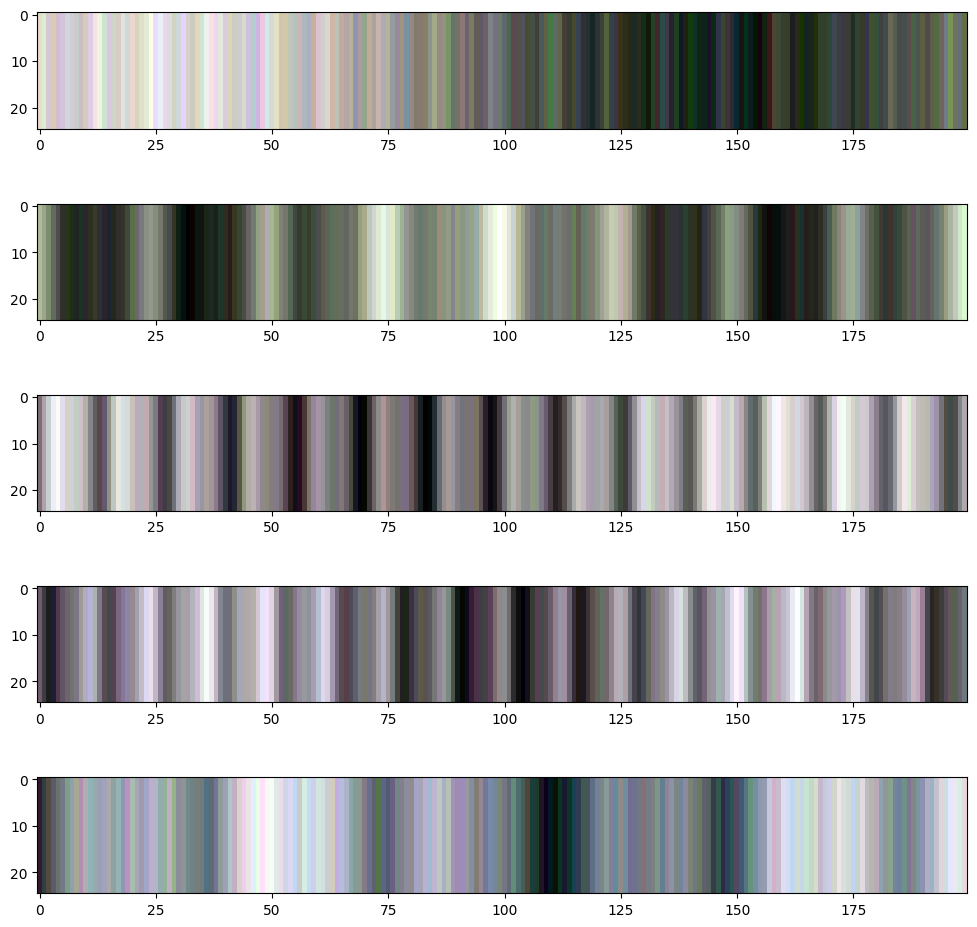

In [14]:
for xi, ax in utils.plotting.iter_grid_plt(X, (5, 1)):
    ax.imshow(torch.permute(xi, (2, 1, 0)))
plt.show()

# Region RGB Signals

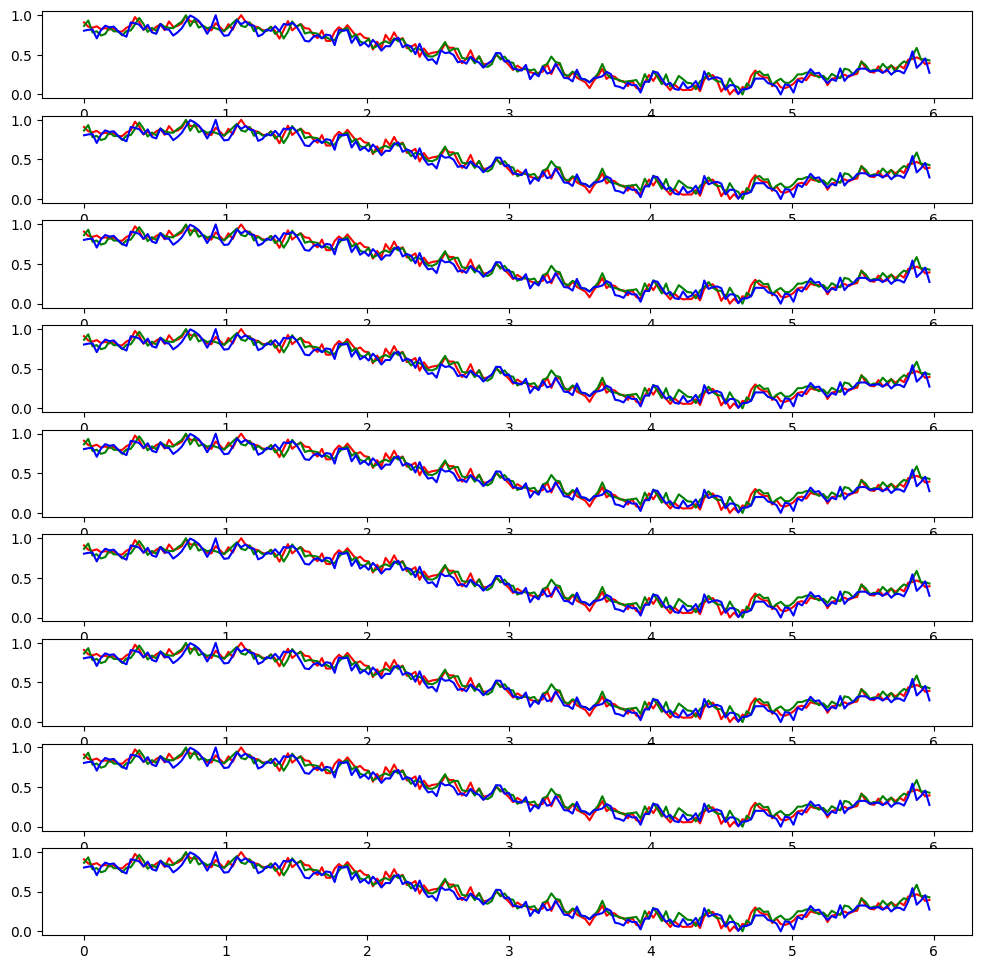

In [15]:
x_example = X[0]
y_example = y[0]
t = np.arange(0,t_size)*sampling_rate

x_example = torch.permute(x_example, (2,0,1))
for xi, ax in utils.plotting.iter_grid_plt(x_example, (9, 1)):
    utils.plotting.plot_signals(t, xi, ax=ax)
plt.show()

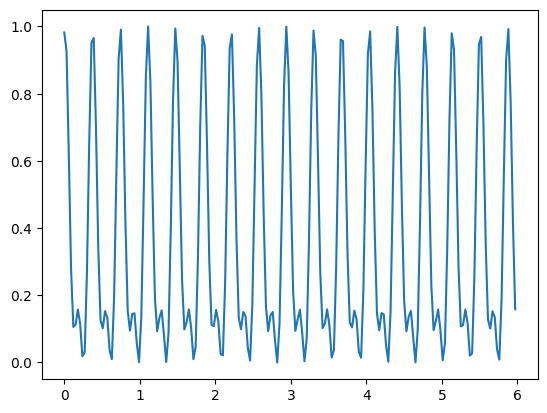

In [16]:
plt.plot(t, y_example)
plt.show()